## 1. Scrape an RGB image from a target webpage

In [6]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

base = "https://www.scrapethissite.com/pages/frames/"
frame_url = base + "?frame=i"  # Direct frame URL

resp = requests.get(frame_url)
soup = BeautifulSoup(resp.text, "html.parser")

img_tag = soup.find("img", class_="turtle-image")
if img_tag and img_tag.get("src"):
    img_url = urljoin(frame_url, img_tag["src"])
    img_data = requests.get(img_url).content
    with open("turtle.jpg", "wb") as f:
        f.write(img_data)
    print("Turtle image saved as turtle.jpg")
else:
    print("Turtle image not found.")


Turtle image saved as turtle.jpg


## 2. Apply Advanced Histogram Analysis

### Display individual Red, Green, Blue histograms.

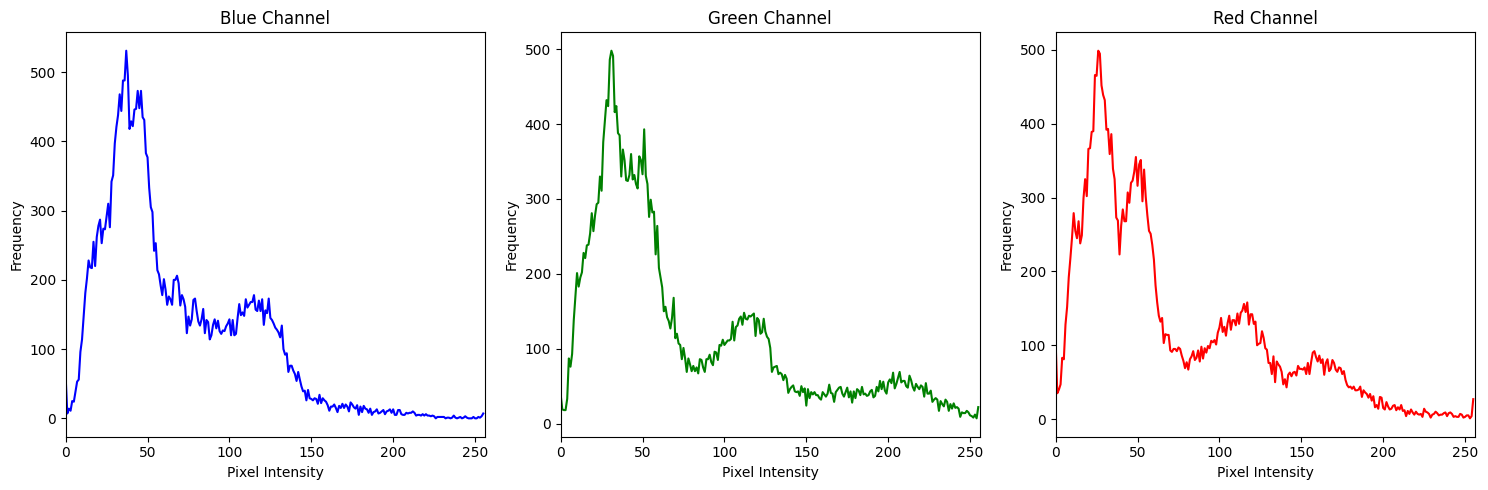

In [12]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('turtle.jpg')
if image is None:
    raise ValueError("Image not loaded. Check the file path.")

b, g, r = cv2.split(image)

colors = ('b', 'g', 'r')
channels = (b, g, r)
titles = ('Blue Channel', 'Green Channel', 'Red Channel')

plt.figure(figsize=(15, 5))

for i, (chan, color, title) in enumerate(zip(channels, colors, titles), 1):
    plt.subplot(1, 3, i)
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Create and display a combined RGB histogram on the same plot.

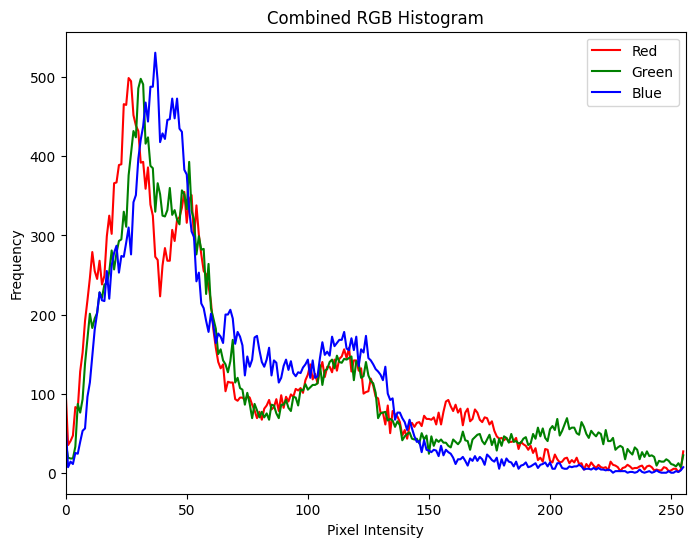

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('turtle.jpg')
b, g, r = cv2.split(image)

hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

plt.figure(figsize=(8,6))
plt.plot(hist_r, color='r', label='Red')
plt.plot(hist_g, color='g', label='Green')
plt.plot(hist_b, color='b', label='Blue')

plt.xlim([0, 256])
plt.title('Combined RGB Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Normalize the histograms for comparison.

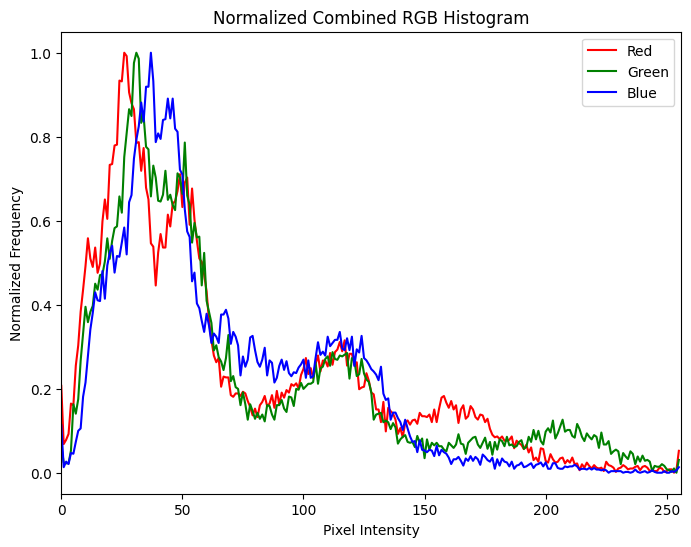

In [ ]:
b, g, r = cv2.split(image)

hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

hist_b = cv2.normalize(hist_b, hist_b, 0, 1, cv2.NORM_MINMAX)
hist_g = cv2.normalize(hist_g, hist_g, 0, 1, cv2.NORM_MINMAX)
hist_r = cv2.normalize(hist_r, hist_r, 0, 1, cv2.NORM_MINMAX)

plt.figure(figsize=(8,6))
plt.plot(hist_r, color='r', label='Red')
plt.plot(hist_g, color='g', label='Green')
plt.plot(hist_b, color='b', label='Blue')

plt.xlim([0, 256])
plt.title('Normalized Combined RGB Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.show()


## 3. Perform Multiple Intensity Transformations

### Logarithmic Transformation for contrast enhancement in dark regions.

C:\Users\bbuser\AppData\Local\Temp\ipykernel_7280\1222681447.py:5: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(image))
C:\Users\bbuser\AppData\Local\Temp\ipykernel_7280\1222681447.py:5: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(image))


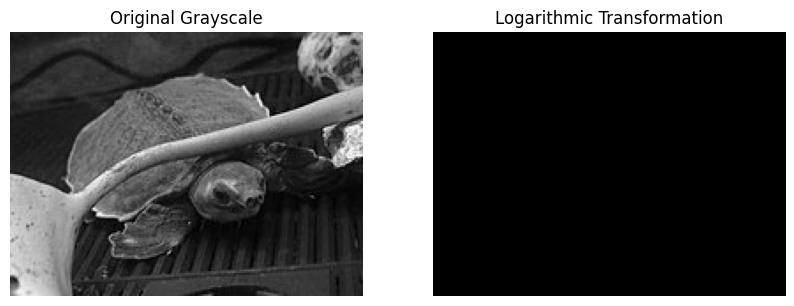

In [23]:
import numpy as np

image = cv2.imread('turtle.jpg', cv2.IMREAD_GRAYSCALE)

c = 255 / np.log(1 + np.max(image))
log_image = c * np.log(1 + image.astype(np.float64))

log_image = np.array(log_image, dtype=np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Grayscale')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Logarithmic Transformation')
plt.imshow(log_image, cmap='gray')
plt.axis('off')

plt.show()


### Gamma Correction with at least two different gamma values.

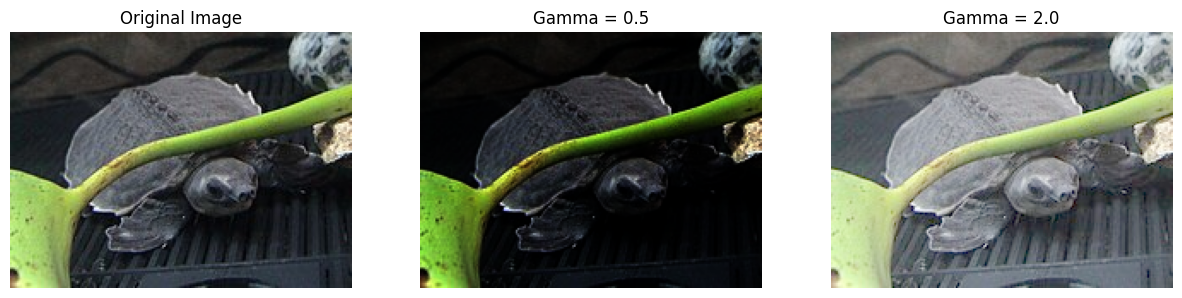

In [24]:
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

image = cv2.imread('turtle.jpg')
if image is None:
    raise ValueError("Image not loaded. Check the file path.")

gamma_values = [0.5, 2.0]

corrected_images = [gamma_correction(image, g) for g in gamma_values]

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

for i, (g, img) in enumerate(zip(gamma_values, corrected_images), 2):
    plt.subplot(1,3,i)
    plt.title(f"Gamma = {g}")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()


### Contrast Stretching with defined min/max intensity values.

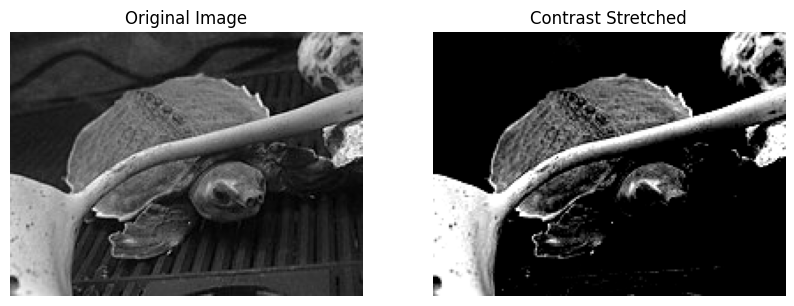

In [25]:
def contrast_stretching(image, r1, r2, s1, s2):
    LUT = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i < r1:
            LUT[i] = 0
        elif r1 <= i <= r2:
            LUT[i] = ((s2 - s1) / (r2 - r1)) * (i - r1) + s1
        else:
            LUT[i] = 255
    return cv2.LUT(image, LUT)

image = cv2.imread('turtle.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not loaded. Check the file path.")

r1, r2 = 70, 180
s1, s2 = 0, 255

stretched = contrast_stretching(image, r1, r2, s1, s2)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Contrast Stretched")
plt.imshow(stretched, cmap='gray')
plt.axis('off')

plt.show()


## 4. Apply Histogram Equalization

### Equalize each RGB channel separately.

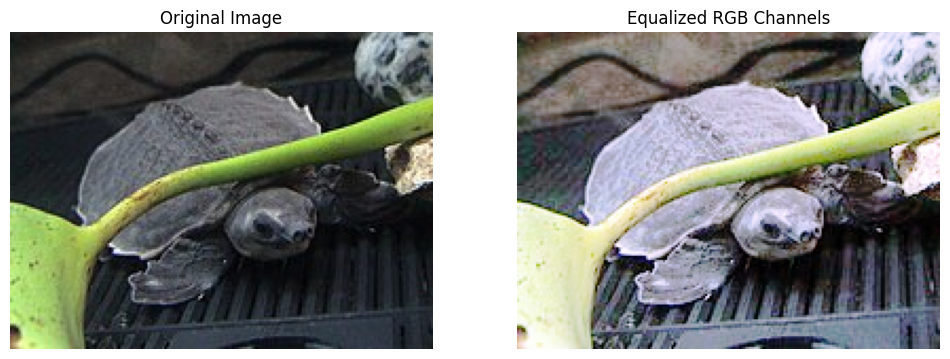

In [29]:
image = cv2.imread('turtle.jpg')

b, g, r = cv2.split(image)

b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)

equalized_img = cv2.merge([b_eq, g_eq, r_eq])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Equalized RGB Channels")
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


### Equalize the luminance channel in YCrCb or LAB space while preserving colors.

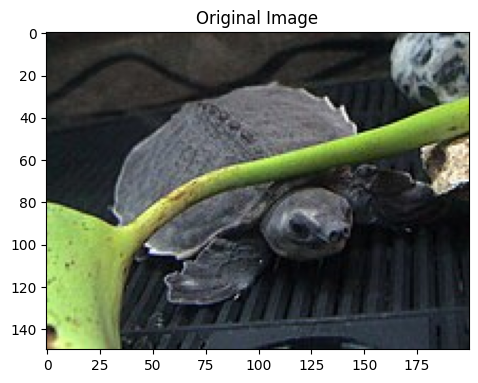

In [30]:
image = cv2.imread('turtle.jpg')

ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

y, cr, cb = cv2.split(ycrcb)

y_eq = cv2.equalizeHist(y)

ycrcb_eq = cv2.merge([y_eq, cr, cb])

result = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


## 5. Thresholding and Segmentation

### Convert to grayscale and apply Otsu’s thresholding.

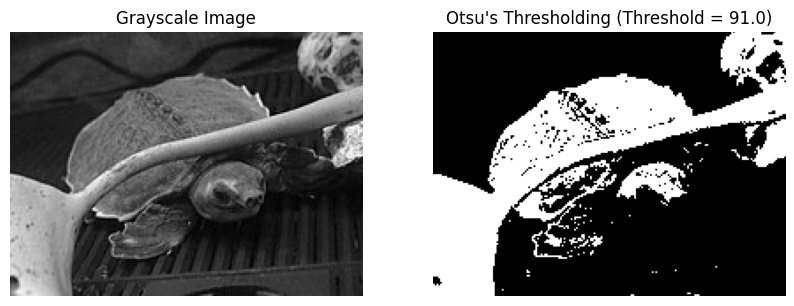

In [34]:
image = cv2.imread('turtle.jpg', cv2.IMREAD_GRAYSCALE)

ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Grayscale Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title(f"Otsu's Thresholding (Threshold = {ret})")
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.show()


### Apply adaptive thresholding and compare results.

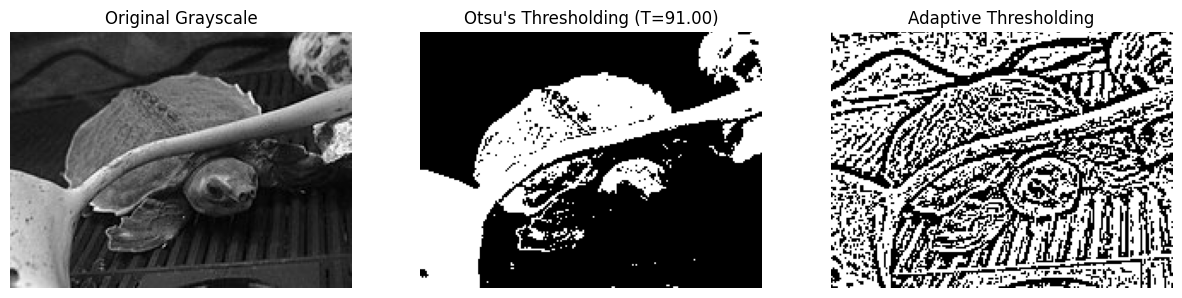

In [35]:
ret, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

adaptive_thresh = cv2.adaptiveThreshold(
    image, 255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    11, 2)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Original Grayscale')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title(f"Otsu's Thresholding (T={ret:.2f})")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Adaptive Thresholding')
plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')

plt.show()


## 6. Visualization Layout

### Show original vs transformed images side-by-side.

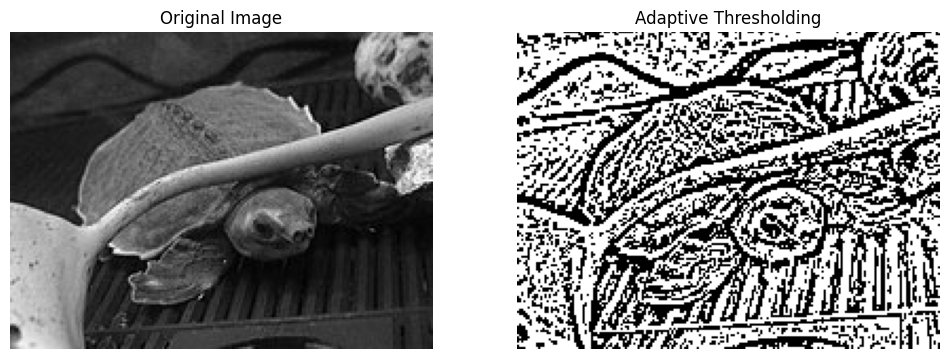

In [40]:
image = cv2.imread('turtle.jpg', cv2.IMREAD_GRAYSCALE)

adaptive_thresh = cv2.adaptiveThreshold(
    image, 255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    11, 2)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Adaptive Thresholding")
plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')

plt.show()


### Show histograms before and after transformations.

[]

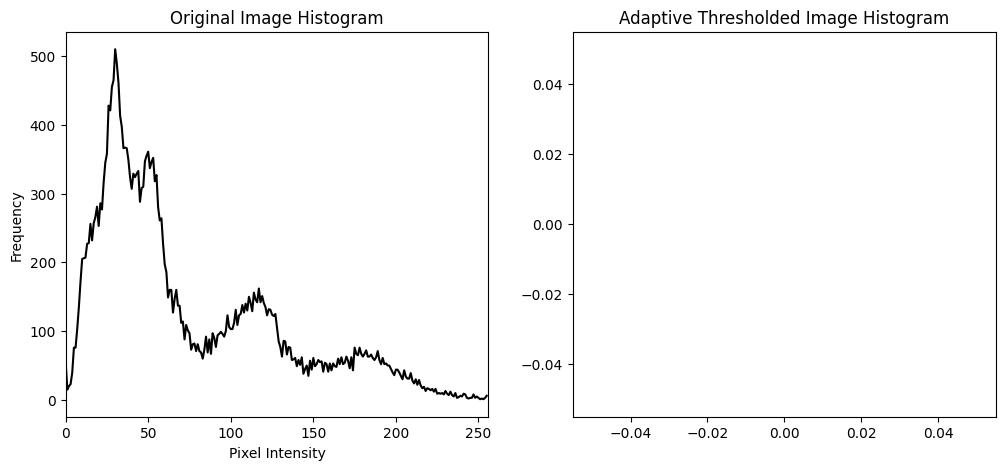

In [41]:
image = cv2.imread('turtle.jpg', cv2.IMREAD_GRAYSCALE)


adaptive_thresh = cv2.adaptiveThreshold(
    image, 255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    11, 2)


hist_orig = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_thresh = cv2.calcHist([adaptive_thresh], [0], None, [256], [0, 256])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Original Image Histogram')
plt.plot(hist_orig, color='black')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.title('Adaptive Thresholded Image Histogram')
plt.plot()


### Arrange results in a multi-row subplot for easy comparison.

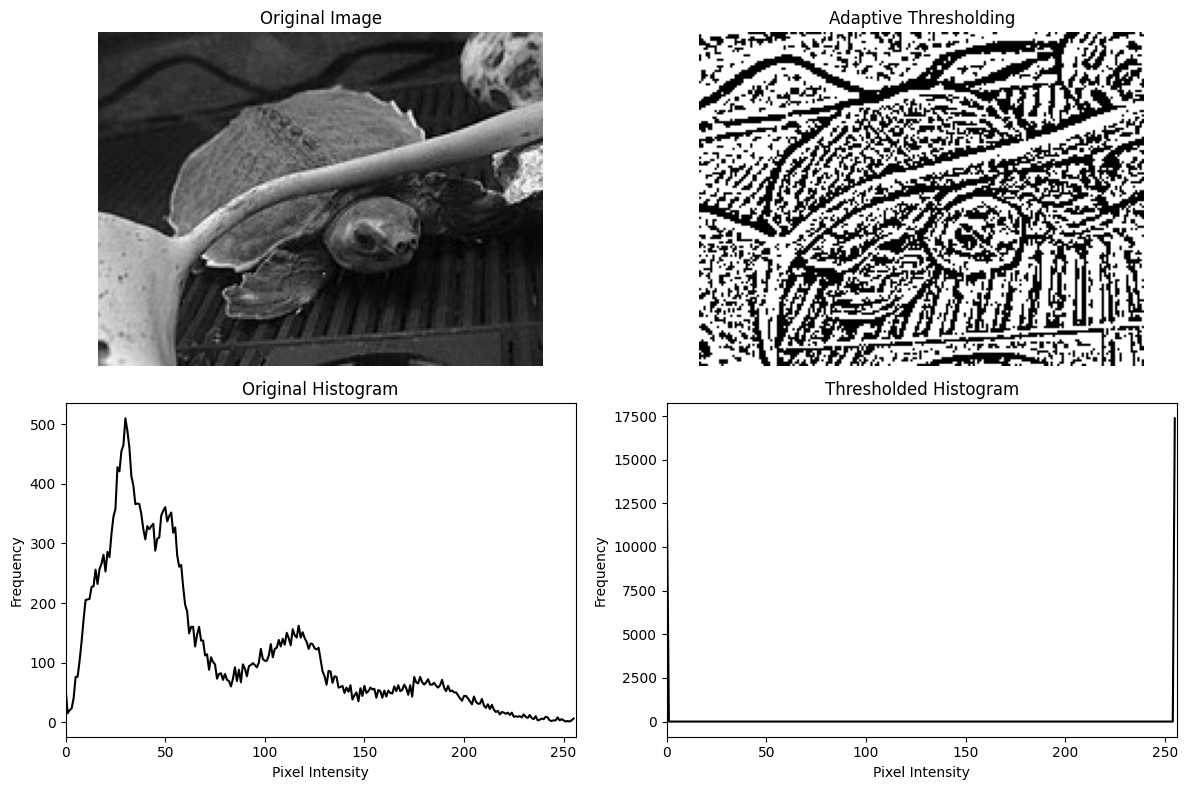

In [42]:
image = cv2.imread('turtle.jpg', cv2.IMREAD_GRAYSCALE)

adaptive_thresh = cv2.adaptiveThreshold(
    image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 2)

hist_orig = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_thresh = cv2.calcHist([adaptive_thresh], [0], None, [256], [0, 256])

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

axs[0, 1].imshow(adaptive_thresh, cmap='gray')
axs[0, 1].set_title("Adaptive Thresholding")
axs[0, 1].axis('off')

axs[1, 0].plot(hist_orig, color='black')
axs[1, 0].set_title("Original Histogram")
axs[1, 0].set_xlim([0, 256])
axs[1, 0].set_xlabel('Pixel Intensity')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].plot(hist_thresh, color='black')
axs[1, 1].set_title("Thresholded Histogram")
axs[1, 1].set_xlim([0, 256])
axs[1, 1].set_xlabel('Pixel Intensity')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
